In [98]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt

## Helper functions

In [99]:
def save_variable_to_file(name, filename):
    named_variable = [v for v in tf.trainable_variables() if v.name == name][0]    
    named_variable_np_array = named_variable.eval()
    
    with open(filename, "w") as outfile:
        np.save(outfile, named_variable_np_array)
    print('Variable: {} saved to file'.format(name))


In [136]:
model = 'log-uniform_FIXED_MNIST'
model_path = '../../models/mnf/mnf_{}/'.format(model)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('{}mnf.meta'.format(model_path))
    saver.restore(sess, tf.train.latest_checkpoint(model_path))

#     for v in tf.global_variables():
#         print(v)

#     save_variable_to_file("fq2_fr2_usezTrue/densemnf_1/mean_W:0", "../../models/mnf/weights/mean_layer1_{}.npz".format(model))
#     save_variable_to_file("fq2_fr2_usezTrue/densemnf_1/var_W:0", "../../models/mnf/weights/var_layer1_{}.npz".format(model))

#     save_variable_to_file("fq2_fr2_usezTrue/densemnf_2/mean_W:0", "../../models/mnf/weights/mean_layer2_{}.npz".format(model))
#     save_variable_to_file("fq2_fr2_usezTrue/densemnf_2/var_W:0", "../../models/mnf/weights/var_layer2_{}.npz".format(model))

INFO:tensorflow:Restoring parameters from ../../models/mnf/mnf_log-uniform_FIXED_MNIST/mnf


In [121]:
def plot_function(weights, subset=True, savefile=None):
    '''
    Plot heatmaps
    '''
    if subset:
        weights = weights[:50, :50]    
    plt.clf()
    plt.imshow(weights)
    plt.colorbar()
    
    if savefile is not None:
        plt.savefig(savefile)

def plot_function_2(weights, savefile=None):
    masked_array = np.ma.masked_where(weights == 0.0, weights)

    cmap = matplotlib.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='black')

    plt.clf()
    plt.imshow(masked_array, cmap=cmap)
#     plt.colorbar(im)
#     plt.show()

    if savefile is not None:
        plt.savefig(savefile)
    plt.show()

## Results on the MNIST data

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_std-normal.npz")
plot_function(weights)

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_cauchy_10-epochs.npz")
plot_function(weights)

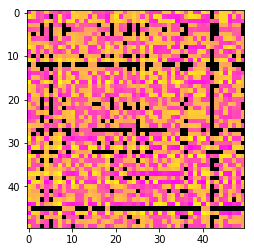

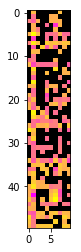

Number of zeros: 2352/5000


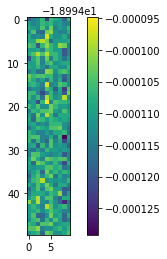

In [122]:
cutoff_threshold = 1

# ************************************* Layer 1 *************************************

# >>>>> Mean Weights
mean_weights_1 = np.load("../../models/mnf/weights/mean_layer1_{}.npz".format(model))
mean_weights_1[(mean_weights_1 >= -cutoff_threshold) & (mean_weights_1 <= cutoff_threshold)] = 0.0

mean_weights_1_1 = mean_weights_1[:50, :50]
mean_weights_1_2 = mean_weights_1[220:270, :50]
mean_weights_1_3 = mean_weights_1[350:400, :50]
plot_function_2(mean_weights_1_1, savefile='../../results/log-uniform_dense1_thres-1.png')

# plot_function(mean_weights_1, subset = False)

# >>>>> Var Weights
# var_weights_1 = np.load("../../models/mnf/weights/var_layer1_{}.npz".format(model))
# plot_function(var_weights_1)

# ************************************* Layer 2 *************************************

# >>>>> Mean Weights

cutoff_threshold = .1

mean_weights_2 = np.load("../../models/mnf/weights/mean_layer2_{}.npz".format(model))
mean_weights_2[(mean_weights_2 >= -cutoff_threshold) & (mean_weights_2 <= cutoff_threshold)] = 0.0

mean_weights_2_1 = mean_weights_2[:50, :]
mean_weights_2_2 = mean_weights_2[220:270, :]
mean_weights_2_3 = mean_weights_2[350:400, :]
plot_function_2(mean_weights_2_1, savefile='../../results/log-uniform_dense2_thres-0.1.png')

x_axis_range = 500
y_axis_range = 10
count = 0
for i in range(x_axis_range):
    for j in range(y_axis_range):
        if mean_weights_2[i, j] >= -.1 and mean_weights_2[i, j] <= .1:
            count += 1

print('Number of zeros: {}/{}'.format(count, x_axis_range * y_axis_range))

# >>>>> Var Weights
var_weights_2 = np.load("../../models/mnf/weights/var_layer2_{}.npz".format(model))

var_weights_2_1 = var_weights_2[:50, :]
var_weights_2_2 = var_weights_2[220:270, :]
var_weights_2_3 = var_weights_2[350:400, :]
plot_function(var_weights_2_1, subset=False)

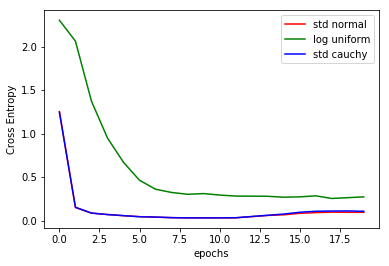

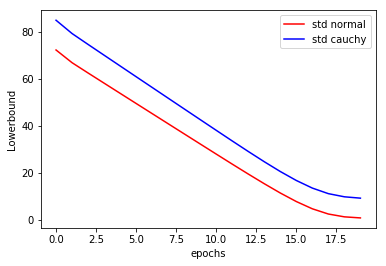

In [135]:
# Entropies and lowerbounds

# std normal
with open('../../models/mnf/mnist_std_normal', 'rb') as f:
    dictionary_sn = pickle.load(f)

# log uniform
with open('../../models/mnf/mnist_log_uniform', 'rb') as f:
    dictionary_lu = pickle.load(f)

# std cauchy
with open('../../models/mnf/mnist_standard_cauchy', 'rb') as f:
    dictionary_sc = pickle.load(f)


ax_a = plt.plot(dictionary_sn['entropies'][:20], c='red', label='std normal')
ax_b = plt.plot(dictionary_lu['entropies'], c='green', label='log uniform')
ax_c = plt.plot(dictionary_sc['entropies'], c='blue', label='std cauchy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Cross Entropy')

plt.figure()
ax_a = plt.plot(dictionary_sn['lowerbounds'][:20], c='red', label='std normal')
ax_c = plt.plot(dictionary_sc['lowerbounds'], c='blue', label='std cauchy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Lowerbound')
plt.savefig('../../results/lowerbound_normal_cauchy.png')

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_log-uniform_clipped-alpha.npz")
plot_function(weights)

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_log-uniform_recent.npz")
weights = weights[:50, :50]
weights[(weights >= -1) & (weights <= 1)] = 0.0
plot_function_2(weights)

In [ ]:
mean_weights = np.load("../../models/mnf/weights/mean_layer1_log-uniform_clipped-alpha.npz")
var_weights = np.load("../../models/mnf/weights/var_layer1_log-uniform_clipped-alpha.npz")

# mean_weights = mean_weights[:50, :50]
# var_weights = var_weights[:50, :50]

mean_weights[(mean_weights >= -1) & (mean_weights <= 1)] = 0.0

# print(mean_weights)

count = 0
for i in range(800):
    for j in range(500):
#         if var_weights[i, j] < -14:
        if mean_weights[i, j] == var_weights[i, j]:
            count += 1
            mean_weights[i, j] = 0.0

print(count)
# plot_function_2(mean_weights)
plot_function_2(mean_weights)

In [137]:
from mnist import MNIST
from keras.utils.np_utils import to_categorical

mnist = MNIST()
(xtrain, ytrain), (xvalid, yvalid), (xtest, ytest) = mnist.images()
xtrain, xvalid, xtest = np.transpose(xtrain, [0, 2, 3, 1]), np.transpose(xvalid, [0, 2, 3, 1]), np.transpose(xtest, [0, 2, 3, 1])
ytrain, yvalid, ytest = to_categorical(ytrain, 10), to_categorical(yvalid, 10), to_categorical(ytest, 10)

In [144]:
from wrappers import MNFLeNet


weights = np.load("../../models/mnf/weights/mean_layer2_log-uniform_FIXED_MNIST.npz")
weights[(weights >= -.1) & (weights <= .1)] = 0.0


# N, height, width, n_channels = xtrain.shape
# iter_per_epoch = N / 100
# input_shape = [None, height, width, n_channels]
# model = MNFLeNet(N, input_shape=input_shape, flows_q=2, flows_r=2, use_z=False,
#                  learn_p=True, thres_var=0.5, flow_dim_h=50)

# x = tf.placeholder(tf.float32, input_shape, name='x')
# y_ = tf.placeholder(tf.float32, [None, 10], name='y_')
# y = model.predict(x)
# yd = model.predict(x, sample=False)
# pyx = tf.nn.softmax(y)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../../models/mnf/TEST/mnf.meta')
    saver.restore(sess, tf.train.latest_checkpoint('../../models/mnf/TEST/'))

    w = [v for v in tf.trainable_variables() if v.name == "fq2_fr2_usezTrue/densemnf_2/mean_W:0"][0]
    w_new = w.assign(tf.convert_to_tensor(weights))
    sess.run(w_new)

#     for v in tf.global_variables():
#         print(v)
    
#     preds = np.zeros_like(ytest)
#     for i in xrange(10):
#         for j in xrange(xtest.shape[0] / 100):
#             pyxi = sess.run(pyx, feed_dict={x: xtest[j * 100:(j + 1) * 100]})
#             preds[j * 100:(j + 1) * 100] += pyxi / 10
#     print
#     sample_accuracy = np.mean(np.equal(np.argmax(preds, 1), np.argmax(ytest, 1)))
#     print '  - Sample test accuracy: {}'.format(sample_accuracy)

INFO:tensorflow:Restoring parameters from ../../models/mnf/TEST/mnf


## Results on the CIFAR-10 data

In [3]:
from cifar10 import CIFAR10
from keras.utils.np_utils import to_categorical

cifar10 = CIFAR10()
(xtrain, ytrain), (xvalid, yvalid), (xtest, ytest) = cifar10.images()
xtrain, xvalid, xtest = np.transpose(xtrain, [0, 2, 3, 1]), np.transpose(xvalid, [0, 2, 3, 1]), np.transpose(xtest, [0, 2, 3, 1])
ytrain, yvalid, ytest = to_categorical(ytrain, 10), to_categorical(yvalid, 10), to_categorical(ytest, 10)

print xtrain.shape

(40000, 32, 32, 3)


In [7]:
# weights = np.load("../../models/mnf/weights/layer1_log-uniform_10-epochs_cifar10.npz")
import cPickle as pickle
with open('../../data/cifar10/data_batch_1', 'rb') as f:
    cifar = pickle.load(f)

(10000, 3072)
(32, 32, 3)


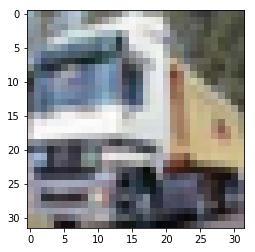

In [15]:

data = cifar['data']
print data.shape

n = np.reshape(data, (data.shape[0], 3, 32, 32))

xtrain = np.transpose(n, [0, 2, 3, 1])

print xtrain[1].shape

plt.imshow(xtrain[1])


# single_image = np.array(data[1])
# single_image_reshaped = np.transpose(np.reshape(single_image,(3, 32, 32)), (1, 2, 0))
# # print(single_image)
# # plt.imshow(single_image_reshaped)
# print single_image_reshaped.shape

In [ ]:
from mnist import MNIST
from keras.utils.np_utils import to_categorical

mnist = MNIST()
(xtrain, ytrain), (xvalid, yvalid), (xtest, ytest) = mnist.images()
print xtrain.shape
xtrain, xvalid, xtest = np.transpose(xtrain, [0, 2, 3, 1]), np.transpose(xvalid, [0, 2, 3, 1]), np.transpose(xtest, [0, 2, 3, 1])
ytrain, yvalid, ytest = to_categorical(ytrain, 10), to_categorical(yvalid, 10), to_categorical(ytest, 10)

print xtrain.shape
print ytrain.shape